# Vibrational Modeling of Cyanogens

**IR spectroscopy** is the measurement of wavelength and intensity of the adsorption of infrared (IR) light by a sample. Following the excitation of the sample with this light a vibration of the molecule is induced. The molecules that will be explored are hydrogen cyanide (Figure 1) and iodide cyanide (Figure 2). These compounds are composed of three different atoms; thus have three different masses. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
#animate with vpython
from vpython import * #watch out for namespace conflicts

# calculate eigenvalues and eigenvectors
from scipy.linalg import eigh

# print to markdown
from IPython.display import display, Markdown, Latex

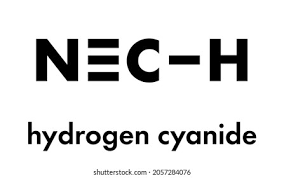
$$Figure 1: Chemical Structure of Hydrogen Cyanide$$

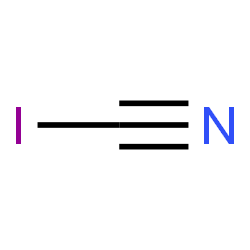
$$Figure 2: Chemical Structure of Iodide Cyanide$$

We can treat the bonds between each of these masses as springs, thus treating the system as three balls of masses; $n$, $m$, and $M$ connected by two springs. $k_{1}$ will represent the stiffness of the bond between $n$ and $m$ while $k_{2}$ represents the stiffness of the bond between $m$ and $M$. The equilibrium position of each ball will be $x_{equil}$, while any movement aside from the equilibrium position of each ball is its new location $x$. The displacement of the position of the ball relative to its equilibrium position is $u_{i} = x_{i}- x_{i,equil}$, where $i$ represents the atom number. Using this value of $u$ we can apply the momentum principle to build our equations to model this system. 

$$F_{net,1} = m_{1} u_{1}$$

$$F_{net,2} = m_{2} u_{2}$$

$$F_{net,3} = m_{3} u_{3}$$

Where $m_{i}$ represents the mass of each atom ($n$, $m$, and $M$) while $u_{i}$ represents the displacement relative to that atom. Note that the displacement of each mass is dependent on the frequency $\omega_n$ an amplitude $a_{i, n}$ of compound when subjected to external factors that produced vibrations. 

$$u_i(t) = a_{i,n}\cos(\omega_n t)$$

Here the first index, $i$, represents the atom number while the second index, $n$, is the normal mode. Previous work has determined there is a normal mode for each mass produced. So for $N$ masses there are $N$ normal modes. 

Once the $F$ of a spring ($k_{s}$) is substituted for each of the values, and the effects of each spring when condensed and extended as well as the position of each atom is evaluated following the derivations and basic algebra produced of which aid in our overall calculation. 


$$k_{1}a_1-k_{1}a_2 + 0 = n\omega^2a_1$$

$$-k_{1}a_1+(k_{1} + k_{2})a_2 – k_{2}a_3 = m\omega^2a_2$$

$$0-k_{2}a_2-k_{2}a_3 = M\omega^2a_3$$

In this way we can express these equations using matrices. 

$$
\left[ {\begin{array}{ccc}
   k_{1} & -k_{1} & 0 \\
   -k_{1} & k_{1} + k_{2} & -k_{2} \\
   0 & -k_{2} & k_{2} \\
  \end{array} } \right]
\left[ {\begin{array}{c}
    a_1 \\
    a_2 \\
    a_3 \\
  \end{array} } \right]
  = \omega^2
\left[ {\begin{array}{ccc}
   n & 0 & 0 \\
   0 & m & 0 \\
   0 & 0 & M \\
  \end{array} } \right]
\left[ {\begin{array}{c}
    a_1 \\
    a_2 \\
    a_3 \\
  \end{array} } \right]
$$

We can then define $\lambda=\omega^2$, where $\lambda$ is called the eigenvalue and $\vec{a}$ is called the eigenvector. To discover the frequencies of our system we will solve for the eigenvalues.

$$[A-\lambda B]\vec{a}=0$$ 

With $n$ representing the modes and $i$ representing the atom, the eigenvectors represent the amplitude: 
$$ \vec{a}_n=
\left[ {\begin{array}{c}
    a_{1,n} \\
    a_{2,n} \\
    a_{3,n} \\
    . \\
    . \\
    . \\
  \end{array} } \right]
$$



Using the displacement equation $u_{i}$ above we can write the general solution as a superposition of the *normal modes*. The general solution for the displacement of mass *i* is a superposition of the normal modes. 

$$u_i(t) = C_1a_{i,1}\cos(\omega_1 t + \phi_{1}) + C_2a_{i,2}\cos(\omega_2 t +  + \phi_{2}) + C_3a_{i,3}\cos(\omega_3 t +  + \phi_{3}) + \cdots$$ 

With this solution in mind, for a three-mass system such as ours, *HCN* and *ICN*, the general analytic solution is: 

$$
\left[ {\begin{array}{c}
    u_1 \\
    u_2 \\
    u_3 \\
  \end{array} } \right]
  = C_1
\left[ {\begin{array}{c}
    a_{11} \\
    a_{21} \\
    a_{31} \\
  \end{array} } \right]
  \cos(\omega_1t + \phi_0)
+ C_2
\left[ {\begin{array}{c}
    a_{12} \\
    a_{22} \\
    a_{32} \\
  \end{array} } \right]
  \cos(\omega_2t + \phi_1)
+ C_3
\left[ {\begin{array}{c}
    a_{13} \\
    a_{23} \\
    a_{33} \\
  \end{array} } \right]
  \cos(\omega_3t + \phi_2)
$$

With the constants (or *coefficients*) $C_1,\ C_2,\ C_3, \phi_1,\ \phi_2,\ \phi_3$ depending on the initial conditions of the atoms.

First, we can set the initial velocities of all atoms to zero so the phases are zero and solve for *) $C_1,\ C_2,\ C_3$ of which are determined by the initial positions of the atoms at t = 0. 

$$u_1=u_{1,initial}=C_1a_{11} + C_2a_{12} + C_3a_{13}$$

$$u_2=u_{2,initial}=C_1a_{21} + C_2a_{22} + C_3a_{23}$$

$$u_3=u_{3,initial}=C_1a_{31} + C_2a_{32} + C_3a_{33}$$

We have three equations and three unknowns, by using linear algebra: 

$$
\left[ {\begin{array}{ccc}
   a_{11} & a_{12} & a_{13} \\
   a_{21} & a_{22} & a_{23} \\
   a_{31} & a_{32} & a_{33} \\
  \end{array} } \right]
\left[ {\begin{array}{c}
    C_1 \\
    C_2 \\
    C_3 \\
  \end{array} } \right]
  = 
\left[ {\begin{array}{c}
    u_{1,initial} \\
    u_{2,initial} \\
    u_{3,initial} \\
  \end{array} } \right]
$$

The numpy function `numpy.linalg.solve()` will solve this equation and return the coefficients:

$$
\left[ {\begin{array}{c}
    C_1 \\
    C_2 \\
    C_3 \\
  \end{array} } \right]
$$


As mentioned previously *hydrogen cyanide*, **HCN** and *iodide cyanide*, **ICN**,  are our compounds of interest. In the literature, when these compounds were subjected to infrared light, the *hydrogen – carbon* and *iodide - carbon* bond of the compounds produced values of 3386 $cm^{-1}$ and 564 $cm^{-1}$ respectively while the *carbon – nitrogen* bond of **HCN** and **ICN** produced values of 2380 $cm^{-1}$ and 2486 $cm^{-1}$ respectively . Using the equations above we will attempt to replicate the frequencies of HCN and ICN found in the literature and investigate the different relationships between values produced. 

### Roadmap
- Simple model of an **HCN** system
- Explorations of $k$ until $f$ matches literature IR values in **HCN**
- General Solution of **HCN**
- Investigations of **HCN**
- Explorations of $k$ and general solution of ICN
- Conclusion

### Assumptions
-	The bond stiffness of chemical compounds is hard to find directly so we are initially assuming $k_{1} = 1 N/m$ and $k_{2} = 1.5 N/m$


In [ ]:
def triatomic(n,m,M):
    #properties of the system
    N = 3 #number of masses

    #properties of each mass
    L0 = 1
    k1 = 1
    k2 = 1.5

    #initial conditions that determine the initial positions of the masses
    ui = np.zeros(N) #initial displacement
    ui[0] = 1 #displace first mass
    ui[1] = 2 #displace second mass
    ui[2] = 3 #displace third mass

    #Build matrices
    A=np.zeros((N,N))
    A[0,0] = k1
    A[0,1] = -k1
    A[1,0] = -k1
    A[1,1] = k1 + k2
    A[1,2] = -k2
    A[2,1] = -k2
    A[2,2] = k2
    
    B=np.identity(N)
    B[0,0] = n
    B[1,1] = m
    B[2,2] = M
   

    #find eigenvalues and eigenvectors
    lamb, a = eigh(A, B)        # eigenvalues and eigenvectors, eigh returns eign values and their vec
    omegas = np.sqrt(lamb)

    print("frequencies (omega):", omegas)
    print("eigenvectors are column vectors in:\n\n", a)
    
    return omegas,a

In [ ]:
omegas,a = triatomic(1.008/6.0221E+26,12.001/6.0221E+26,14.007/6.0221E+26)

In the cells above we built our matrices based off the calculations and stored these values within our global variables, `omegas` and `a`. The masses of Hydrogen, Carbon and Nitrogen are 1.008 $g/mol$, 12.001 $g/mol$ and 14.007 $g/mol$ respectively. By dividing these values by the mass by Avagadro's Constant, we successfully convert these values for use in our code. 

The literature paper found 3386 $cm^{-1}$ and 2380 $cm^{-1}$ to be produced when subjecting the H—C bond and C—N bond to IR respectively. These values must be converted to *Hertz* to be in the proper units to compare to our experimental values. By using the equation below:

$$f = \frac{2\pi}{\omega}$$

Where $f$ is the frequency of vibrations observed and the $\omega$ represents the angular frequency, we can convert this value to $Hertz$. Note the angular frequency is equal to the stiffness over m in first mode (which we often neglect because it is so close to zero). 


In [ ]:
#experimental omega values calculated above 
omega1 = omegas[1] #rad/sec
omega2 = omegas[2] #rad/sec

#experimental frequencies conversion to Hz
frequency1 = omega1/2*np.pi
frequency2 = omega2/2*np.pi

#literature calculations of frequencies 
wavenumber1 = 3386 #1/cm
wavenumber2 = 2380 #1/cm
flit1 = wavenumber1*100*3e8 #Hz
flit2 = wavenumber2*100*3e8 #Hz

print("\n literature frequencies (Hz):, f1={:.2e}, f2={:.2e}".format(flit1,flit2))
print("\n experimental frequencies (Hz): f1={:.2e}, f2={:.2e}".format(frequency1, frequency2))

When considering which bond corresponds to each $k$ value, the **electronegativity** of each atom must be considered. **Electronegativity** is the tendency for an atom of a given chemical element to attract shared electrons (or electron density) when forming a chemical bond. *Nitrogen* is more electronegative than *Carbon*, however *Hydrogen* is the least electronegative than all atoms on the periodic table. Being that *Carbon* is only two atoms away from *Nitrogen* on the periodic table (where the electrongeativity of atoms increase going up and to the right of the table), *Nitrogen* and *Carbon* are fairly close in negativity resulting a stronger bond formation between the two than the bond formed between *Carbon* and *Hydrogen*. The difference in electronegativity between neighboring atoms makes the bond between the atoms more weak, thus bonds with a large difference in electronegativity likley have a low stiffness, $k$. 


## Exploring Values of k
Following the conversion of both our experimental omega values and the literature wavenumber values to $Hertz$, we can see the literature frequencies were found to be $1.02e14$ $Hz$ and $7.14e13$ $Hz$ while the experimental values with values of $k_{1} = 1 N/m$ and $k_{2} = 1.5 N/m$ were found to produce frequencies of $1.81e13$ $Hz$ and $4.02e13$ $Hz$. Now that we have created a code capable of producing angular frequencies and we have converted our literature values, we can now explore what values of $k$ will produce the same literature frequencies. 

We will also determine if our understanding of electronegativity will be true when if we find $k_{1}$ to be smaller than $k_{2}$. 

In [ ]:
def triatomic1(n,m,M):
    #properties of the system
    N = 3 #number of masses

    #properties of each mass
    L0 = 1
    k1 = 3.496 #N/m
    k2 = 42.89 #N/m

    #initial conditions that determine the initial positions of the masses
    ui = np.zeros(N) #initial displacement
    ui[0] = 1 #displace first mass
    ui[1] = 2 #displace second mass
    ui[2] = 3 #displace third mass

    #Build matrices
    A=np.zeros((N,N))
    A[0,0] = k1
    A[0,1] = -k1
    A[1,0] = -k1
    A[1,1] = k1 + k2
    A[1,2] = -k2
    A[2,1] = -k2
    A[2,2] = k2
    
    B=np.identity(N)
    B[0,0] = n
    B[1,1] = m
    B[2,2] = M

    #find eigenvalues and eigenvectors
    lamb, a = eigh(A, B)        # eigenvalues and eigenvectors, eigh returns eign values and their vec
    omegas = np.sqrt(lamb)

    print("frequencies (omega):", omegas)
    print("eigenvectors are column vectors in:\n\n", a)

    return omegas,a

In [ ]:
omegas,a = triatomic1(1.008/6.0221E+26,12.001/6.0221E+26,14.007/6.0221E+26)

In [ ]:
#experimental omega values calculated above  
omega1 = omegas[1] #rad/sec
omega2 = omegas[2] #rad/sec

#experimental frequencies being converted to Hz
frequency1 = omega1/2*np.pi
frequency2 = omega2/2*np.pi

#literature calculations of frequencies 
wavenumber1 = 3386 #1/cm
wavenumber2 = 2380 #1/cm
flit1 = wavenumber1*100*3e8 #Hz
flit2 = wavenumber2*100*3e8 #Hz

print("\n literature frequencies (Hz):, f1={:.2e}, f2={:.2e}".format(flit1,flit2))
print("\n experimental frequencies (Hz): f1={:.2e}, f2={:.2e}".format(frequency1, frequency2))

In [ ]:
N = 3
mode = 1
h = 0.01*1e-14
ttotal = 50*1e-14 #total time for calculations

#ith atom is the row
# array of times
t = np.arange(0,ttotal,h)

# build data array with all data; u[:,0] is time; other columns are u_i for each atom i
u = np.zeros((int(ttotal/h), N+1)) #this is a 2d array, (first column of u array will be in first row)

u[:,0] = np.transpose(t) #t.T <-- syntax for 2d arrays (:, all rows; 0, 0th column)

for i in range(N):
    u_atom = a[i,mode]*np.cos(omegas[mode]*t)
    u[:,i+1] = np.transpose(u_atom)[:]

# plot
plt.figure(figsize=(6,4))
plt.title("displacement of each atom")
plt.xlabel("t (s)")
plt.ylabel("$u_i$ (m)")
atoms = ['H', 'C', 'N']
for i in range(N): #plot each atom
    plt.plot(u[:,0], u[:,i+1], label=atoms[i])
plt.grid()
plt.legend()
plt.show()

We were able to successfully produce the literature values of $k$ however, in the code above, eigenvectors of $10^{13}$ in *meters* were produced when the distance between bonds are typically in angstroms ($10^{-10}$ *meters*). Solving for the coefficient values mentioned in the beginning will enable us to produce reasonable eigenvectors that make sense according to our system. More conclusions can be made from our code the more accurate we make our simulation. 

## Finding the general solution for HCN

To do this, we will displace one mass; either $n$ (**H** or **I**) or **N** from its equilibrium based on the literature value reported on its bond length to **C**. Using the numpy function `numpy.linalg.solve()` we will produce the coefficients making our code more realistic. 

In [ ]:
N=3
#initial conditions
bond1 = 1.06e-10 #length of H-C bond in 
bond2 = 1.156e-10
ui = np.zeros(N) #initial displacement
ui[0] = -4*bond1 #displace first mass

#calculate coefficients using initial conditions
C = np.linalg.solve(a,ui)
print("\n The coefficients based on initial conditions are: \n\n", C)

#build the general solution
h = 0.01*1e-14
ttotal = 100*1e-14
t = np.arange(0,ttotal,h)

u = np.zeros((len(t),N+1))
u[:,0] = np.transpose(t) #store time in first column, u_i in other columns

for i in range(N):
    for w in range(0,len(omegas)):
        u[:,i+1] = u[:,i+1] + C[w]*a[i,w]*np.cos(omegas[w]*t)

print("\n The positions of all masses at all times are: [t, u_1, u_2, ...] \n\n", u)

plt.figure(figsize=(6,4))
plt.title("Displacement of each mass")
plt.plot(u[:,0],u[:,1],label='H')
plt.plot(u[:,0],u[:,2],label='C')
plt.plot(u[:,0],u[:,3],label='N')
plt.xlabel('t (s)')
plt.ylabel('u (m)')
plt.legend()
plt.show()


Now that our simulation is more accurate, we can investigate different relationships with our code to validate the accuracy of its build and the values of $k$ produced. 

With our modeled compound of HCN replicating masses on a spring, we can use the following equation to represent the work of our system: 

$$W = \frac{1}{2}k_{n}A_{n}^{2}$$

Using the above equation we can substitute the value of $k$ for the *hydrogen-carbon* bond and substitute the maximum amplitude of *H* from the graph to calculate the $W$ placed into our system that was done to displace *Hydrogen*. 

The $W$ value produced will enable us to make the following theoretical calculation of the amplitude produced by *Nitrogen* to determine if our code matches the theoretical work. 

$$ A_{2} = (\frac{2W}{k_{2}})^{\frac{1}{2}} $$

Assumptions 
-	$ W = \delta U $ to break a bond
- $U_{elec} = oofpez\frac{q_{1}q_{2}}{r}$ producing a $10^{-18}$ while our calculation of $E$ produced a value of $10^{-19}$. 


In [ ]:
#maximum amplitude of Hydrogen displacement
aH1 = np.amax(u[:,1]) 

#maximum amplitude of Nitrogen displacemnet
aN1 = np.amax(u[:,3])

#work applied to acheive displacement
W = 0.5*3.496*aH1**2

print("experimental amplitude of H (dis. of H) = ", aH1)
print("experimental amplitude of N (dis. of H) = ", aN1)
print("work done on system (dis. of H) =  ", W)

In [ ]:
N=3
#initial conditions
bond1 = 1.06e-10 #length of H-C bond in m
bond2 = 1.156e-10 #length of C-N bond in m
ui = np.zeros(N) #initial displacement
ui[0] = -4*bond2 #displace second mass

#calculate coefficients using initial conditions
C = np.linalg.solve(a,ui)
print("\n The coefficients based on initial conditions are: \n\n", C)

#build the general solution
h = 0.01*1e-14
ttotal = 100*1e-14
t = np.arange(0,ttotal,h)

u = np.zeros((len(t),N+1))
u[:,0] = np.transpose(t) #store time in first column, u_i in other columns

for i in range(N):
    for w in range(0,len(omegas)):
        u[:,i+1] = u[:,i+1] + C[w]*a[i,w]*np.cos(omegas[w]*t)

#print("\n The positions of all masses at all times are: [t, u_1, u_2, ...] \n\n", u)

plt.figure(figsize=(6,4))
plt.title("Displacement of each mass")
plt.plot(u[:,0],u[:,1],label='H')
plt.plot(u[:,0],u[:,2],label='C')
plt.plot(u[:,0],u[:,3],label='N')
plt.xlabel('t (s)')
plt.ylabel('u (m)')
plt.legend()
plt.show()


In [ ]:
#theoretical maximum amplitude of Nitrogen displacement
aNt = (2*W/42.89)**0.5

#experimental maximum amplitude of Nitrogen displacement
aN2 = np.amax(u[:,3])

#experimental maximum amplitude of Hydrogen displacemnet
aH2 = np.amax(u[:,1])


print("work done on system (dis. of H) =  ", W)
print("experimental amplitude of H (dis. of H) = ", aH1)
print("experimental amplitude of H = (dis. of N)", aH2)
print("experimental amplitude of N (dis. of H) = ", aN1)
print("theoretical amplitude of N (dis. of N)= ", aNt)
print("experimental amplitude of N (dis. of N) = ", aN2)


Within this investigation, our experimental calculations for *Nitrogen* were far smaller than our theoretical calculations. This is likely because our code is modeled after mass on a spring, thus the difference over 10 in mass of *Nitrogen* and *Carbon* compared to *Hydrogen* are likely resulting in this. 

The displacement of *Hydrogen* resulted in a smaller maximum amplitude for *Nitrogen* than the displacement *Nitrogen*. The *Hydrogen* amplitude was also smaller in the displacement of *Nitrogen* than in its on displacement, which can be explained by the movement of the *Nitrogen* atom (being the largest mass of the three) disrupting the center of mass. 

Now that we have investigated our simulations regarding *HCN* we can discover the values of *k* and the coefficients of *ICN* and compare the effects the identity of the atom bonded to the cyanide (*CN*) has. 


## Exploring values of k in ICN and finding its general solution

In [ ]:
def triatomic2(n,m,M):
    #properties of the system
    N = 3 #number of masses

    #properties of each mass
    L0 = 1
    k1 = 4.85 #N/m
    k2 = 46.5 #N/m

    #initial conditions that determine the initial positions of the masses
    ui = np.zeros(N) #initial displacement
    ui[0] = 1 #displace first mass
    ui[1] = 2 #displace second mass

    #Build matrices
    A=np.zeros((N,N))
    A[0,0] = k1
    A[0,1] = -k1
    A[1,0] = -k1
    A[1,1] = k1 + k2
    A[1,2] = -k2
    A[2,1] = -k2
    A[2,2] = k2
    
    B=np.identity(N)
    B[0,0] = n
    B[1,1] = m
    B[2,2] = M

    #find eigenvalues and eigenvectors
    lamb, a = eigh(A, B)        # eigenvalues and eigenvectors, eigh returns eign values and their vec
    omegas = np.sqrt(lamb)

    print("frequencies (omega):", omegas)
    print("eigenvectors are column vectors in:\n\n", a)

    return omegas,a

In [ ]:
omegas,a = triatomic2(126.9045E+26/6.0221E+26,12.001/6.0221E+26,14.007/6.0221E+26)

In [ ]:
#experimental omega values calculated above  
omega1 = omegas[1] #rad/sec
omega2 = omegas[2] #rad/sec

#experimental frequencies being converted to Hz
frequency1 = omega1/2*np.pi
frequency2 = omega2/2*np.pi

#literature calculations of frequencies 
wavenumber1 = 3486 #1/cm
wavenumber2 = 546 #1/cm
flit1 = wavenumber1*100*3e8 #Hz
flit2 = wavenumber2*100*3e8 #Hz

print("\n literature frequencies (Hz):, f1={:.2e}, f2={:.2e}".format(flit1,flit2))
print("\n experimental frequencies (Hz): f1={:.2e}, f2={:.2e}".format(frequency1, frequency2))

In [ ]:
N = 3
mode = 1
h = 0.01*1e-13
ttotal = 50*1e-13 #total time for calculations

#ith atom is the row
# array of times
t = np.arange(0,ttotal,h)

# build data array with all data; u[:,0] is time; other columns are u_i for each atom i
u = np.zeros((int(ttotal/h), N+1)) #this is a 2d array, (first column of u array will be in first row)

u[:,0] = np.transpose(t) #t.T <-- syntax for 2d arrays (:, all rows; 0, 0th column)

for i in range(N):
    u_atom = a[i,mode]*np.cos(omegas[mode]*t)
    u[:,i+1] = np.transpose(u_atom)[:]
    
# plot
plt.figure(figsize=(8,6))
plt.title("displacement of each atom")
plt.xlabel("t (s)")
plt.ylabel("$u_i$ (m)")
atoms = ['I', 'C', 'N']
for i in range(N): #plot each atom
    plt.plot(u[:,0], u[:,i+1], label=atoms[i])
plt.grid()
plt.legend()
plt.show()

In [ ]:
N=3
#initial conditions
bond1 = 1.992e-10 #length of I-C bond in m 
bond2 = 1.160e-10 #length of C-N bond in m
ui = np.zeros(N) #initial displacement
ui[2] = -1*bond1 #displace first mass

#calculate coefficients using initial conditions
C = np.linalg.solve(a,ui)
print("\n The coefficients based on initial conditions are: \n\n", C)

#build the general solution
h = 0.01*1e-14
ttotal = 10*1e-13
t = np.arange(0,ttotal,h)

u = np.zeros((len(t),N+1))
u[:,0] = np.transpose(t) #store time in first column, u_i in other columns

for i in range(N):
    for w in range(1,len(omegas)):
        u[:,i+1] = u[:,i+1] + C[w]*a[i,w]*np.cos(omegas[w]*t)

print("\n The positions of all masses at all times are: [t, u_1, u_2, ...] \n\n", u)

plt.figure(figsize=(8,6))
plt.title("Displacement of each mass")
plt.plot(u[:,0],u[:,1],label='I')
plt.plot(u[:,0],u[:,2],label='C')
plt.plot(u[:,0],u[:,3],label='N')
plt.xlabel('t (s)')
plt.ylabel('u (m)')
plt.legend()
plt.show()


## Conclusion

Our main goal was to replicate the literature frequencies of $HCN$ and $ICN$ by building matrices to calculate the angular frequencies, $\omega$. We built a simple model to calculate the frequencies of $HCN$ using values of $1$ and $1.5$ respectively for each value of $k$, and plugged in the masses of each molecule converted into $kg$. Following this conversion, dozens of varying ratios and values of $k_{1}$ and $k_{2}$ were tried to replicate the literature values in both $HCN$ and $ICN$. 

After several attempts, $k_{1} = 3.496$ $N/m$ and $k_{2} = 42.89$ $N/m$ were found to produce the literature values if $HCN$ while a $k_{1} = 4.85$ $N/m$ and $k_{2} = 46.5$ $N/m$ produced the values of $ICN$. Although the frequencies were not produced in the same order as the literature values, regardless of the various ratios of $k$, the second value produced was always the larger frequency value, suggesting the order of the angular frequencies produced does not align with the literature. 
With *Iodide* having a molecular weight of $126.904 \frac {g}{mol}$ compared to the $1.008 \frac {g}{mol}$ molecular weight of *Hydrogen*, the $k_{1}$ values ($4.85$ and $3.496$ respectively) reveal the influence *electronegativity* , *hybridization* and *sterics* play in the stiffness of bonds. The *CN* bond of $ICN$ and $HCN$ produced a stiffness of $46.5$ and $42.89$ respectively, thus the triple bond (*hybridization*) of *Carbon – Nitrogen* bond produces larger values compared to $k_{1}$ however the difference in size (*sterics*) of *Iodide* compared to *Hydrogen* and/or the difference in *electronegativity* results in the difference of approximately $4$ between these bonds. The same inference can be made about the difference of approximately $1$ between the $k_{1}$ values, it is unknown if the weight difference of the electronegativity difference between *Iodide* or *Hydrogen* account for this difference.
In all we were able to successfully replicate the literature values reported by the Chemistry Department of Purdue University and investigate the relationships of our systems. 

Vibrational Modes of Hydrogen Cyanide, https://www.chem.purdue.edu/jmol/vibs/hcn.html. 

Vibrational Modes of Iodide Cyanide, https://www.chem.purdue.edu/jmol/vibs/icn.html

Lengths of bonds in Hydrogen Cyanide, https://cccbdb.nist.gov/exp2x.asp?casno=74908&charge=0#1979Kim/Kin:1967

Lengths of bonds in Iodide Cyanide, https://cccbdb.nist.gov/exp2x.asp?casno=506785&charge=0
